In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline
from matplotlib.colors import LogNorm
from matplotlib import rcParams

In [2]:
output_dir = "/Users/konstantinpfrang/ctaout/"

In [3]:
def calc_angular_resolution(off_angle, trueE, q=0.68, erange=[0.01, 100], bins=10):
    '''
    off_angle - pd.Series
    true_e - pd.Series
    quantile - float
    erange - list, upper an lower edge in TeV
    ebins - int, number of bins
    '''

    ebins_log = np.linspace(np.log10(erange[0]), np.log10(erange[1]), bins+1)
    ebins = np.power(10, ebins_log)

    quantiles = np.zeros(shape=[2, bins])
    # loop over bins in energy
    for i in range(bins):

        angles_bin = off_angle.loc[(trueE >= ebins[i]) &\
                                   (trueE <= ebins[i+1])]
        N = len(angles_bin)

        quantiles[0, i] = angles_bin.quantile(q)
        # error of quantile follows binominal distribution
        quantiles[1, i] = np.sqrt(N * q * ( 1 - q)) / N

    # calculate mean positions 
    pos_log = np.mean(np.array([ebins_log[:-1], ebins_log[1:]]), axis=0)
    pos = np.power(10, pos_log)
    # get asymmetrical bin widths
    err = [pos - ebins[:-1], ebins[1:] - pos]

    return quantiles, pos, err

# Requirement

In [4]:
loge = [-1.64983, -1.49475, -1.32191, -1.05307, -0.522689, 
        0.139036, 0.949169, 1.67254,  2.20447, 2.49232]
e = np.power(10, loge)
angres = [0.453339 , 0.295111 , 0.203515 , 0.138619 , 0.0858772, 0.0569610, 0.0372988, 0.0274391, 0.0232297, 0.0216182]

# Cut in multiplicity

### Standard mutiplicity 5

### Multiplicity 4, comparison default weights with LUT weights

by default `weight = moments.intensity * (moments.length / moments.width)` is used.

In [5]:
max_files = None

#### Default weights, $N_{images} > 4$

In [6]:
datadir_default = os.path.abspath("{}/Multiplicity4/default_weights/".format(output_dir))

data_default = None
for file in glob.glob("{}/output*gamma*".format(datadir_default))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_default = pd.concat([data_default, datafile])
    except NameError:
        data_default = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### LUT weights, $N_{images} > 4$

In [7]:
datadir_LUT = os.path.abspath("{}/Multiplicity4/LUT_weights/".format(output_dir))

data_LUT = None
for file in glob.glob("{}/output*gamma*".format(datadir_LUT))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_LUT = pd.concat([data_LUT, datafile])
    except NameError:
        data_LUT = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### LUT weights, cut on ratio width / length, $N_{images} > 4$

In [8]:
datadir_LUT_ratiocut = os.path.abspath("{}/Multiplicity4/LUT_weights_ratiocut/".format(output_dir))

data_LUT_ratiocut = None
for file in glob.glob("{}/output*gamma*".format(datadir_LUT_ratiocut))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_LUT_ratiocut = pd.concat([data_LUT_ratiocut, datafile])
    except NameError:
        data_LUT_ratiocut = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### LUT weights, cut on ratio width / length, $N_{images} > 4$, cut 2 per type and drop types

In [9]:
datadir_LUT_ratiocut_pertype = os.path.abspath("{}/Multiplicity4_perType/LUT_weights_ratiocut_removedTypes_0801/".format(output_dir))

data_LUT_ratiocut_pertype = None
for file in glob.glob("{}/output*gamma*".format(datadir_LUT_ratiocut_pertype))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_LUT_ratiocut_pertype = pd.concat([data_LUT_ratiocut_pertype, datafile])
    except NameError:
        data_LUT_ratiocut_pertype = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


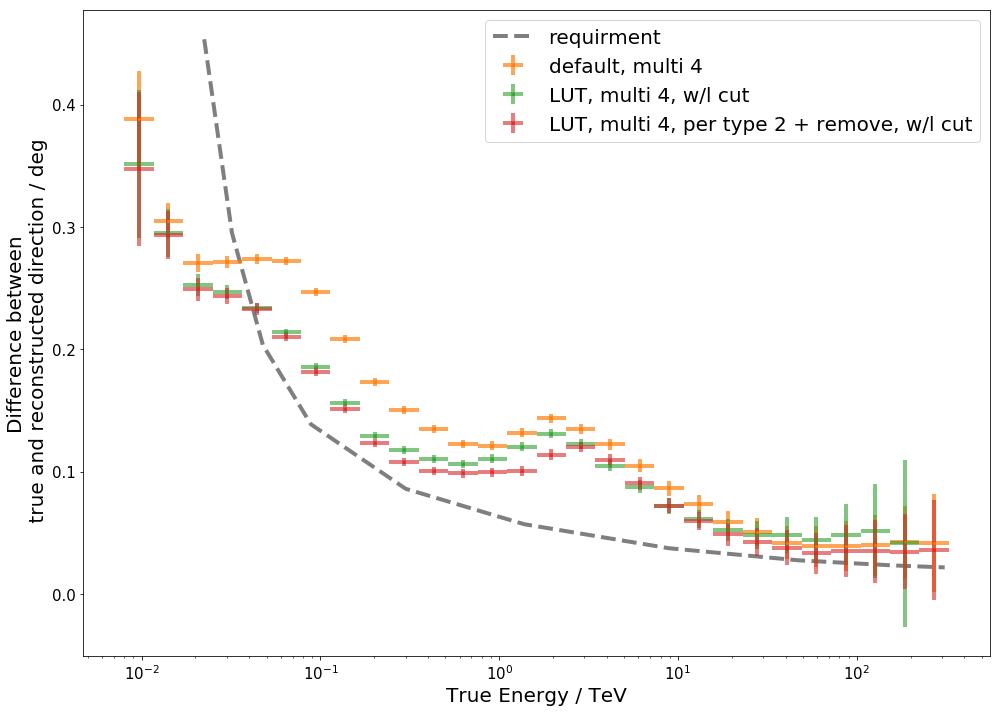

In [10]:
quantiles_default, pos, err_default = calc_angular_resolution(off_angle=data_default.off_angle,
                                  trueE=data_default.MC_Energy, erange=[0.008, 700], bins=30)

quantiles_LUT, pos, err_LUT = calc_angular_resolution(off_angle=data_LUT.off_angle,
                                  trueE=data_LUT.MC_Energy, erange=[0.008, 700], bins=30)

quantiles_LUT_ratiocut, pos, err_LUT_ratiocut = calc_angular_resolution(off_angle=data_LUT_ratiocut.off_angle,
                                  trueE=data_LUT_ratiocut.MC_Energy, erange=[0.008, 700], bins=30)

quantiles_LUT_ratiocut_pertype, pos, err_LUT_ratiocut_pertype = calc_angular_resolution(off_angle=data_LUT_ratiocut_pertype.off_angle,
                                  trueE=data_LUT_ratiocut_pertype.MC_Energy, erange=[0.008, 700], bins=30)


plt.figure(figsize=(14,10))
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
plt.xscale('log')
#plt.ylim([0,.5])
plt.errorbar(pos, quantiles_default[0], quantiles_default[1], err_default, fmt="o", color="C1", zorder=10,
             label="default, multi 4", linewidth=4, markersize=2, alpha=0.7)
#plt.errorbar(pos, quantiles_LUT[0], quantiles_LUT[1], err_LUT, fmt="o", color="C0", zorder=10,
#             label="LUT, multi 4 ", linewidth=4, markersize=2, alpha=0.7)
plt.errorbar(pos, quantiles_LUT_ratiocut[0], quantiles_LUT_ratiocut[1], err_LUT_ratiocut, fmt="o", color="C2", zorder=10,
             label="LUT, multi 4, w/l cut", linewidth=4, markersize=2, alpha=0.6)
plt.errorbar(pos, quantiles_LUT_ratiocut_pertype[0], quantiles_LUT_ratiocut_pertype[1], err_LUT_ratiocut_pertype, fmt="o", color="C3", zorder=10,
             label="LUT, multi 4, per type 2 + remove, w/l cut", linewidth=4, markersize=2, alpha=0.6)

plt.plot(e, angres, linewidth=4, label="requirment", color="k", alpha=0.5, linestyle="--")
plt.xlabel("True Energy / TeV", fontsize=20)
plt.ylabel("Difference between\n true and reconstructed direction / deg", fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Standardarray_default_vs_LUT.pdf")

# Comparison of different multiplicity cuts

In [11]:
max_files = 500

#### default weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 3) keep all if one passed

In [12]:
datadir_def_keep = os.path.abspath("{}Multiplicity4_perType/defaultWeights_ratiocut_keepTypes_SST3_0801".format(output_dir))

data_def_keep = None
for file in glob.glob("{}/output*gamma*".format(datadir_def_keep))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_def_keep = pd.concat([data_def_keep, datafile])
    except NameError:
        data_def_keep = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### default weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 3) remove types

In [13]:
datadir_def_remove = os.path.abspath("{}/Multiplicity4_perType/defaultWeights_ratiocut_removedTypes_SST3_0801".format(output_dir))

data_def_remove = None
for file in glob.glob("{}/output*gamma*".format(datadir_def_remove))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_def_remove = pd.concat([data_def_remove, datafile])
    except NameError:
        data_def_remove = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### LUT weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 3) keep all if one passed

In [14]:
datadir_LUT_keep = os.path.abspath("{}Multiplicity4_perType/LUT_weights_ratiocut_keepTypes_SST3_0801".format(output_dir))

data_LUT_keep = None
for file in glob.glob("{}/output*gamma*".format(datadir_LUT_keep))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_LUT_keep = pd.concat([data_LUT_keep, datafile])
    except NameError:
        data_LUT_keep = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### LUT weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 3) remove types

In [15]:
datadir_LUT_remove = os.path.abspath("{}Multiplicity4_perType/LUT_weights_ratiocut_removedTypes_SST3_0801".format(output_dir))

data_LUT_remove = None
for file in glob.glob("{}/output*gamma*".format(datadir_LUT_remove))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_LUT_remove = pd.concat([data_LUT_remove, datafile])
    except NameError:
        data_LUT_remove = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


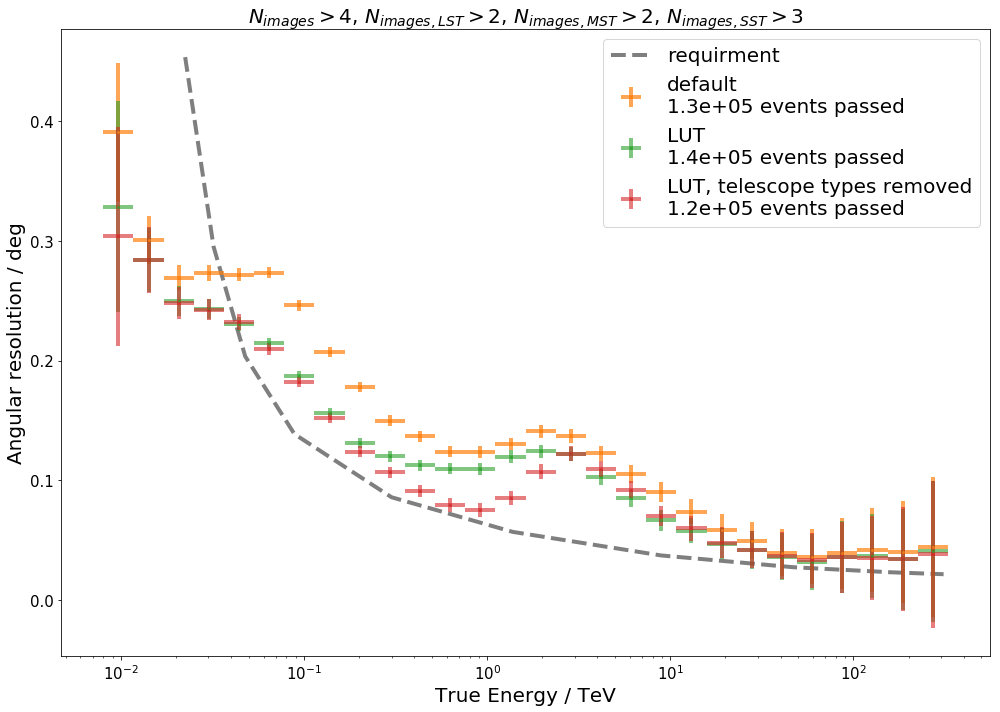

In [16]:
q_default_keep, pos, err_default_keep = calc_angular_resolution(off_angle=data_def_keep.off_angle,
                                  trueE=data_def_keep.MC_Energy, erange=[0.008, 700], bins=30)

q_default_remove, pos, err_default_remove = calc_angular_resolution(off_angle=data_def_remove.off_angle,
                                  trueE=data_def_remove.MC_Energy, erange=[0.008, 700], bins=30)

q_LUT_keep, pos, err_LUT_keep = calc_angular_resolution(off_angle=data_LUT_keep.off_angle,
                                  trueE=data_LUT_keep.MC_Energy, erange=[0.008, 700], bins=30)

q_LUT_remove, pos, err_LUT_remove = calc_angular_resolution(off_angle=data_LUT_remove.off_angle,
                                  trueE=data_LUT_remove.MC_Energy, erange=[0.008, 700], bins=30)


plt.figure(figsize=(14,10))
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
plt.xscale('log')
#plt.ylim([0,.5])
plt.errorbar(pos, q_default_keep[0], q_default_keep[1], err_default_keep, fmt="o", color="C1", zorder=10,
             label="default\n{:1.1e} events passed".format(len(data_def_keep)), linewidth=4, markersize=2, alpha=0.7)
#plt.errorbar(pos, q_default_remove[0], q_default_remove[1], err_default_remove, fmt="o", color="C0", zorder=10,
#             label="default weights remove types ", linewidth=4, markersize=2, alpha=0.7)
plt.errorbar(pos, q_LUT_keep[0], q_LUT_keep[1], err_LUT_keep, fmt="o", color="C2", zorder=10,
             label="LUT\n{:1.1e} events passed".format(len(data_LUT_keep)), linewidth=4, markersize=2, alpha=0.6)
plt.errorbar(pos, q_LUT_remove[0], q_LUT_remove[1], err_LUT_remove, fmt="o", color="C3", zorder=10,
             label="LUT, telescope types removed\n{:1.1e} events passed".format(len(data_LUT_remove)), linewidth=4, markersize=2, alpha=0.6)

plt.plot(e, angres, linewidth=4, label="requirment", color="k", alpha=0.5, linestyle="--")
plt.xlabel("True Energy / TeV", fontsize=20)
plt.ylabel("Angular resolution / deg", fontsize=20)
plt.title(r"$N_{images}>4$, $N_{images, LST}>2$, $N_{images, MST}>2$, $N_{images, SST}>3$", fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Standardarray_def_LUT_removed_telescopes.pdf")

# Comparison of different multiplicity cuts SST4

In [17]:
max_files = 500

#### default weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 4) keep all if one passed

In [18]:
datadir_def_keep = os.path.abspath("{}Multiplicity4_perType/SST4/default_keep".format(output_dir))

data_def_keep = None
for file in glob.glob("{}/output*gamma*".format(datadir_def_keep))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_def_keep = pd.concat([data_def_keep, datafile])
    except NameError:
        data_def_keep = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### default weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 4) remove types

In [19]:
datadir_def_remove = os.path.abspath("{}Multiplicity4_perType/SST4/default_removed".format(output_dir))

data_def_remove = None
for file in glob.glob("{}/output*gamma*".format(datadir_def_remove))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_def_remove = pd.concat([data_def_remove, datafile])
    except NameError:
        data_def_remove = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### LUT weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 4) keep all if one passed

In [20]:
datadir_LUT_keep = os.path.abspath("{}Multiplicity4_perType/SST4/LUT_keep".format(output_dir))

data_LUT_keep = None
for file in glob.glob("{}/output*gamma*".format(datadir_LUT_keep))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_LUT_keep = pd.concat([data_LUT_keep, datafile])
    except NameError:
        data_LUT_keep = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

#### LUT weights, cut on ratio width / length, $N_{images} > 4$, cut per type 2 (SST 4) remove types

In [21]:
datadir_LUT_remove = os.path.abspath("{}Multiplicity4_perType/SST4/LUT_remove".format(output_dir))

data_LUT_remove = None
for file in glob.glob("{}/output*gamma*".format(datadir_LUT_remove))[:max_files]:
    datafile = pd.read_hdf(file, key="direction_reconstriction")
    try:
        data_LUT_remove = pd.concat([data_LUT_remove, datafile])
    except NameError:
        data_LUT_remove = datafile
    except (HDF5ExtError, OSError):
        print("Not able to read {}".format(file))
        continue

/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


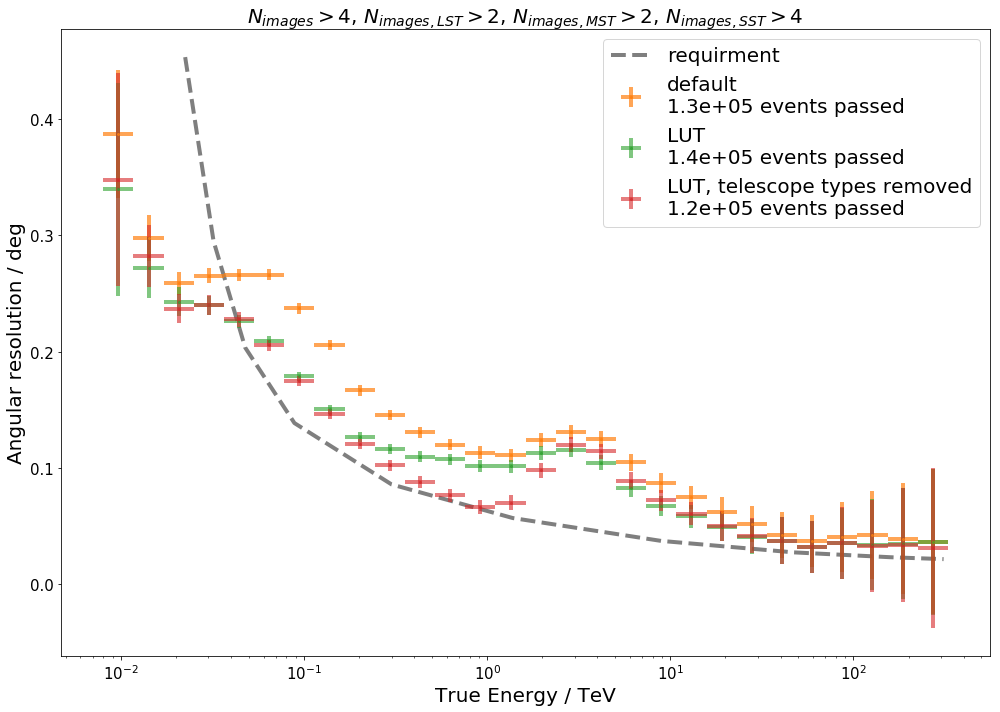

In [22]:
q_default_keep, pos, err_default_keep = calc_angular_resolution(off_angle=data_def_keep.off_angle,
                                  trueE=data_def_keep.MC_Energy, erange=[0.008, 700], bins=30)

q_default_remove, pos, err_default_remove = calc_angular_resolution(off_angle=data_def_remove.off_angle,
                                  trueE=data_def_remove.MC_Energy, erange=[0.008, 700], bins=30)

q_LUT_keep, pos, err_LUT_keep = calc_angular_resolution(off_angle=data_LUT_keep.off_angle,
                                  trueE=data_LUT_keep.MC_Energy, erange=[0.008, 700], bins=30)

q_LUT_remove, pos, err_LUT_remove = calc_angular_resolution(off_angle=data_LUT_remove.off_angle,
                                  trueE=data_LUT_remove.MC_Energy, erange=[0.008, 700], bins=30)


plt.figure(figsize=(14,10))
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
plt.xscale('log')
#plt.ylim([0,.5])
plt.errorbar(pos, q_default_keep[0], q_default_keep[1], err_default_keep, fmt="o", color="C1", zorder=10,
             label="default\n{:1.1e} events passed".format(len(data_def_keep)), linewidth=4, markersize=2, alpha=0.7)
#plt.errorbar(pos, q_default_remove[0], q_default_remove[1], err_default_remove, fmt="o", color="C0", zorder=10,
#             label="default weights remove types ", linewidth=4, markersize=2, alpha=0.7)
plt.errorbar(pos, q_LUT_keep[0], q_LUT_keep[1], err_LUT_keep, fmt="o", color="C2", zorder=10,
             label="LUT\n{:1.1e} events passed".format(len(data_LUT_keep)), linewidth=4, markersize=2, alpha=0.6)
plt.errorbar(pos, q_LUT_remove[0], q_LUT_remove[1], err_LUT_remove, fmt="o", color="C3", zorder=10,
             label="LUT, telescope types removed\n{:1.1e} events passed".format(len(data_LUT_remove)), linewidth=4, markersize=2, alpha=0.6)

plt.plot(e, angres, linewidth=4, label="requirment", color="k", alpha=0.5, linestyle="--")
plt.xlabel("True Energy / TeV", fontsize=20)
plt.ylabel("Angular resolution / deg", fontsize=20)
plt.title(r"$N_{images}>4$, $N_{images, LST}>2$, $N_{images, MST}>2$, $N_{images, SST}>4$", fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Standardarray_def_LUT_removed_telescopes_SST4.pdf")

/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


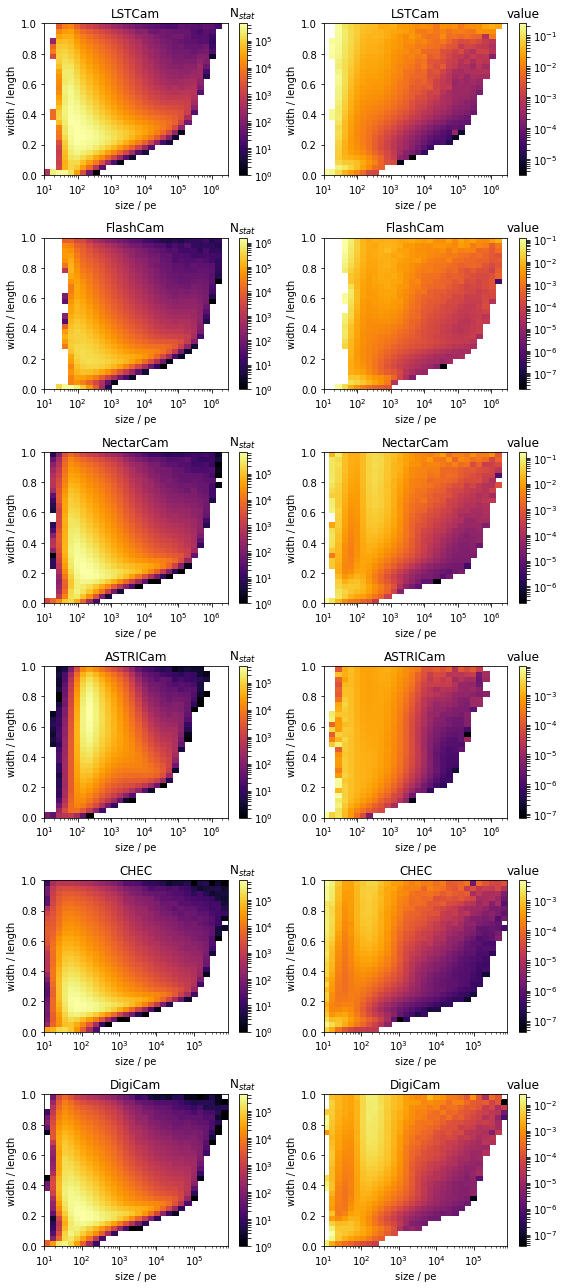

In [4]:
from direction_LUT import *

LUTgen = LookupGenerator.load("../../scripts/write_feature_list/ctapipe_aux_dir/direction_weights_LUT_all.json")
LUTgen.display_lookup(xlabel="size / pe", ylabel="width / length")

# Playground

## Analyze one file

In [18]:
from ctapipe.coordinates import CameraFrame, HorizonFrame
from astropy.coordinates import SkyCoord

from ctapipe.visualization import CameraDisplay   # plot camera images
from ctapipe.io import event_source               # read rata
from ctapipe.calib import CameraCalibrator        # calibration from r0 to dl1
from ctapipe.calib.camera.gainselection import pick_gain_channel # gain selection
from ctapipe.image.cleaning import tailcuts_clean # image cleaning
from ctapipe.image import hillas_parameters       # parametrization
from traitlets.config import Config               # handeling of configurations
from ctapipe.io import EventSeeker
import pickle

In [24]:
calibrator_cfg = Config()
calibrator_cfg["ChargeExtractorFactory"]["product"] = "LocalPeakIntegrator" # peak detection method
calibrator_cfg['WaveformCleanerFactory']['product'] = "NullWaveformCleaner" # waveform cleaning
calibrator_cfg["ChargeExtractorFactory"]["window_width"] = 7 # width of integration window
calibrator_cfg["ChargeExtractorFactory"]["window_shift"] = 3 # shift of integration window

calibrator = CameraCalibrator(r1_product="HESSIOR1Calibrator", config=calibrator_cfg)

# Thresholds for gain channel selection
pe_thresh = {
    "ASTRICam": 14,
    "LSTCam": 100,
    "NectarCam": 190}

# Ecample: make the LUT

In [25]:
source = event_source("/Users/konstantinpfrang/CTAPIPE/gamma_onSource/\
gamma_20deg_180deg_run1___cta-prod3_desert-2150m-Paranal-merged.simtel.gz",
                     max_events=20)

lookupdata = {}
columns = ["dca", "length", "width", "intensity"]

hillas_dict = {}

LUTgen = LookupGenerator()

for event in source:
    hillas_dict = {}
    calibrator.calibrate(event)
    
    for tel_id in event.r0.tels_with_data:

        camera = event.inst.subarray.tel[tel_id].camera

        if camera.cam_id in pe_thresh.keys():
            image, mask = pick_gain_channel(event.dl1.tel[tel_id].image,
                      pe_thresh[camera.cam_id], select_by_sample=True)
        else:
            image = np.squeeze(event.dl1.tel[tel_id].image)

        mask = tailcuts_clean(camera, image=image,
            min_number_picture_neighbors=2)

        if sum(mask) == 0:
            continue
        cleaned_image = np.copy(image) # copy of image
        cleaned_image[~mask] = 0 # setting not survived pixels to zero

        params = hillas_parameters(camera, cleaned_image)
        hillas_dict[tel_id] = params
    
    LUTgen.collect_data(event, hillas_dict)

/Users/konstantinpfrang/Software/ctasoft/ctapipe/ctapipe/image/hillas.py:565: RuntimeWarning: invalid value encountered in sqrt
  width = np.sqrt((vy2 + vx2 - z) / 2.0)


/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


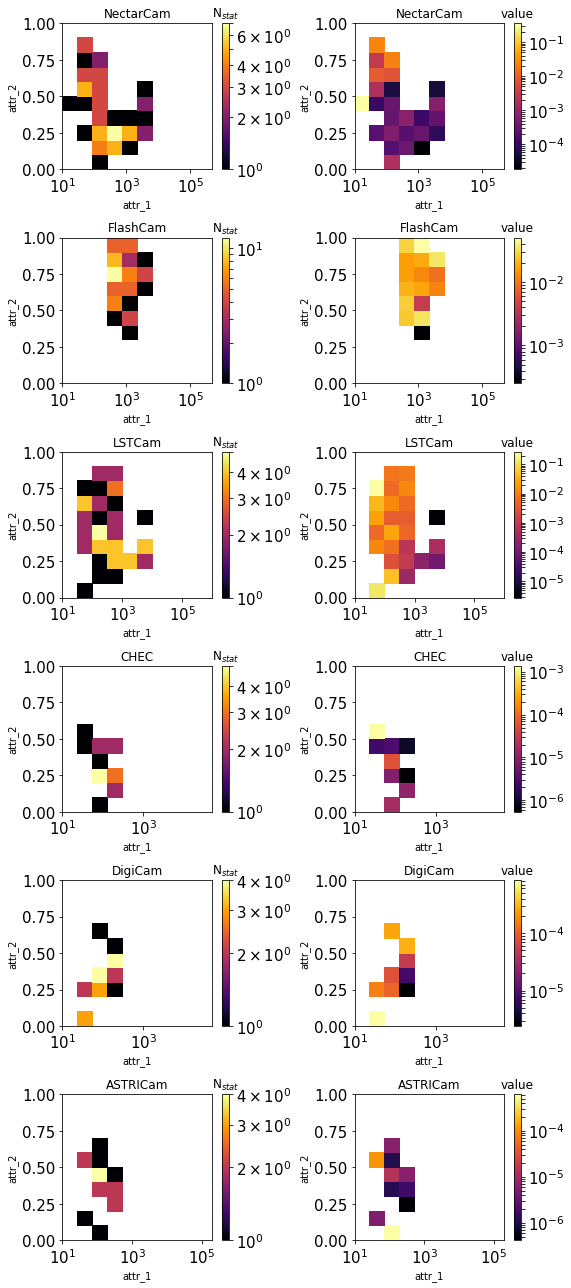

In [26]:
size_max = {"NectarCam": 500000,
    "FlashCam": 500000,
    "LSTCam": 1000000,
    "ASTRICam": 200000,
    "DigiCam": 50000,
    "CHEC": 50000}

LUT = LUTgen.make_lookup(size_max, bins=[10,10])

LUTgen.display_lookup()

In [97]:
dfile = "/Users/konstantinpfrang/CTAPIPE/gamma_cone/gamma_20deg_180deg_run1___cta-prod3_desert-2150m-Paranal-merged_cone10.simtel.gz"
onfile = "/Users/konstantinpfrang/CTAPIPE/gamma_onSource/gamma_20deg_180deg_run1___cta-prod3_desert-2150m-Paranal-merged.simtel.gz"

In [98]:
dsource = event_source(dfile)
onsource = event_source(onfile)

In [112]:
from astropy.coordinates.angle_utilities import angular_separation

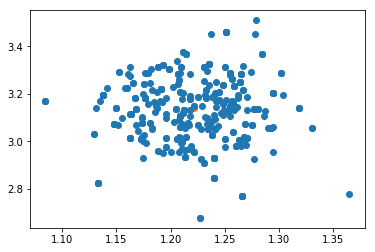

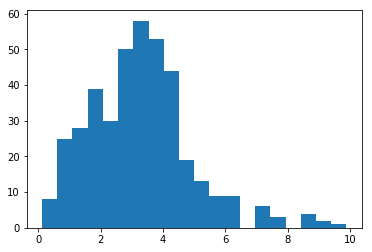

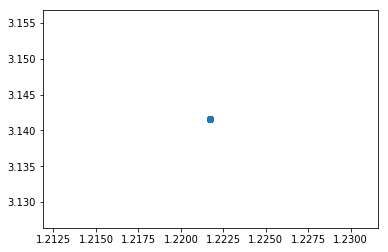

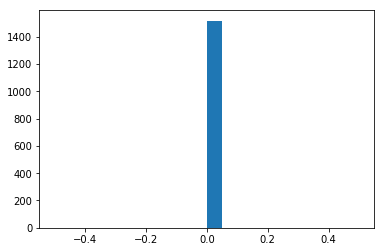

In [124]:
for source in [dsource, onsource]:

    mc = {"az": [], "alt": []}
    pointing = np.zeros(2)
    off_angles = []
    for event in source:
        mc["az"].append(event.mc.az.value)
        mc["alt"].append(event.mc.alt.value)
        if event.count == 0:
            for tel_id in event.r0.tels_with_data:
                pointing[1] = event.mc.tel[tel_id].azimuth_raw
                pointing[0] = event.mc.tel[tel_id].altitude_raw
                break
        
        off_angle = angular_separation(event.mc.az, event.mc.alt,
                                       pointing[1] * u.rad, pointing[0] * u.rad)
        off_angles.append(off_angle.to(u.deg).value)
    
    plt.scatter(pointing[0], pointing[1], color="C1")
    plt.scatter(mc["alt"], mc["az"])
    plt.show()
    
    plt.hist(off_angles, bins=20)
    plt.show()

In [139]:
offangle_bins = np.linspace(0,10, 6)

In [156]:
offangle_bins

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [154]:
np.max(np.arange(len(offangle_bins))[offangle_bins < 11])

5

In [150]:
tel_id = next(iter(event.r0.tels_with_data))

In [151]:
event.mc.tel[tel_id].altitude_raw

1.2217304706573486

In [148]:
event

ctapipe.io.containers.DataContainer:
                          r0.*: Raw Data
                          r1.*: R1 Calibrated Data
                         dl0.*: DL0 Data Volume Reduced Data
                         dl1.*: DL1 Calibrated image
                         dl2.*: Reconstructed Shower Information
                          mc.*: Monte-Carlo data
                    mcheader.*: Monte-Carlo run header data
                        trig.*: central trigger information
                         count: number of events processed
                        inst.*: instrumental information (deprecated
                   pointing[*]: Telescope pointing positions

In [162]:
a = {1:np.array([1,2,3,4]), 2:[5,6,7]}

In [169]:
for b in a:
    a[b]

In [170]:
a

{1: array([1, 2, 3, 4]), 2: [5, 6, 7]}

In [191]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


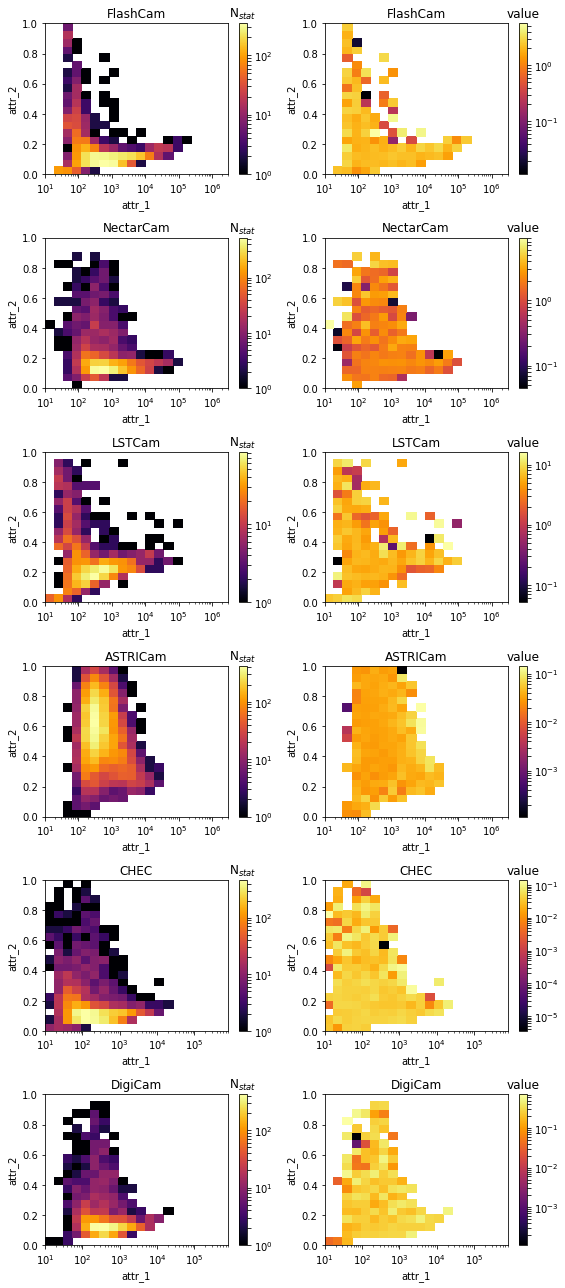

In [182]:
LUTgen.display_lookup()

------- bin 0.0 to 1.0deg -------


/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


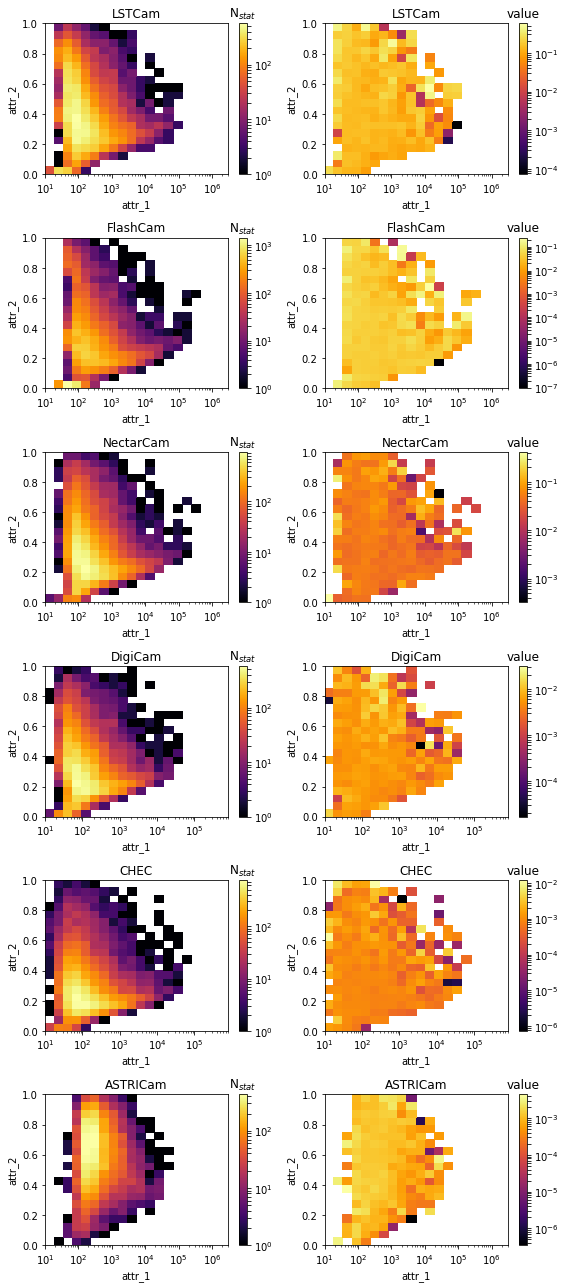

------- bin 1.0 to 2.0deg -------


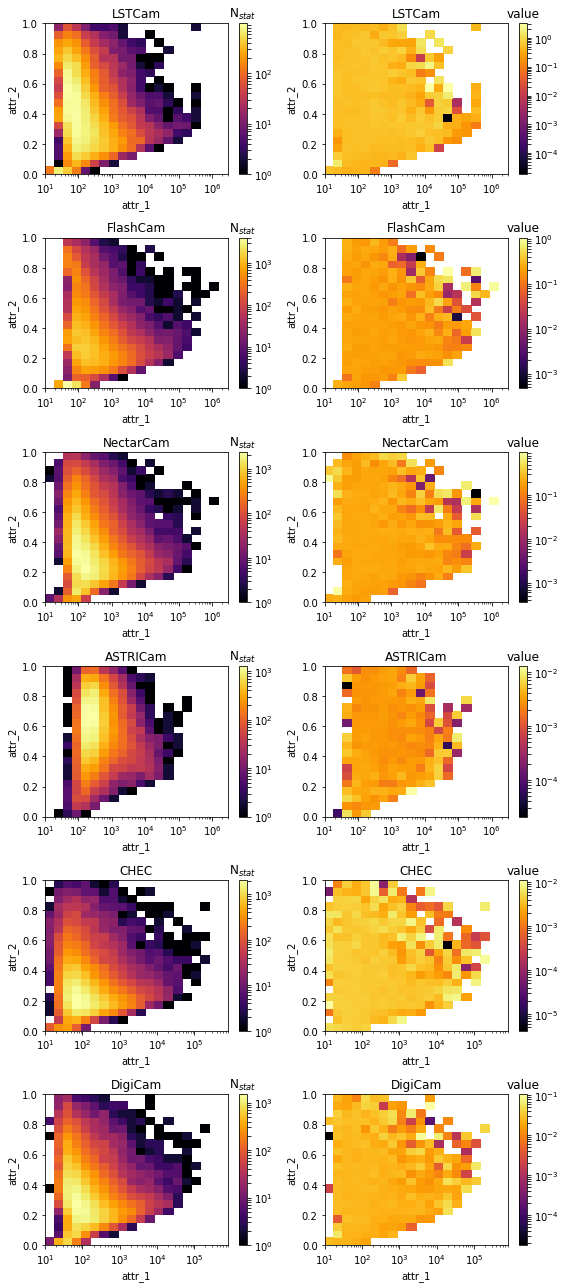

------- bin 2.0 to 3.0deg -------


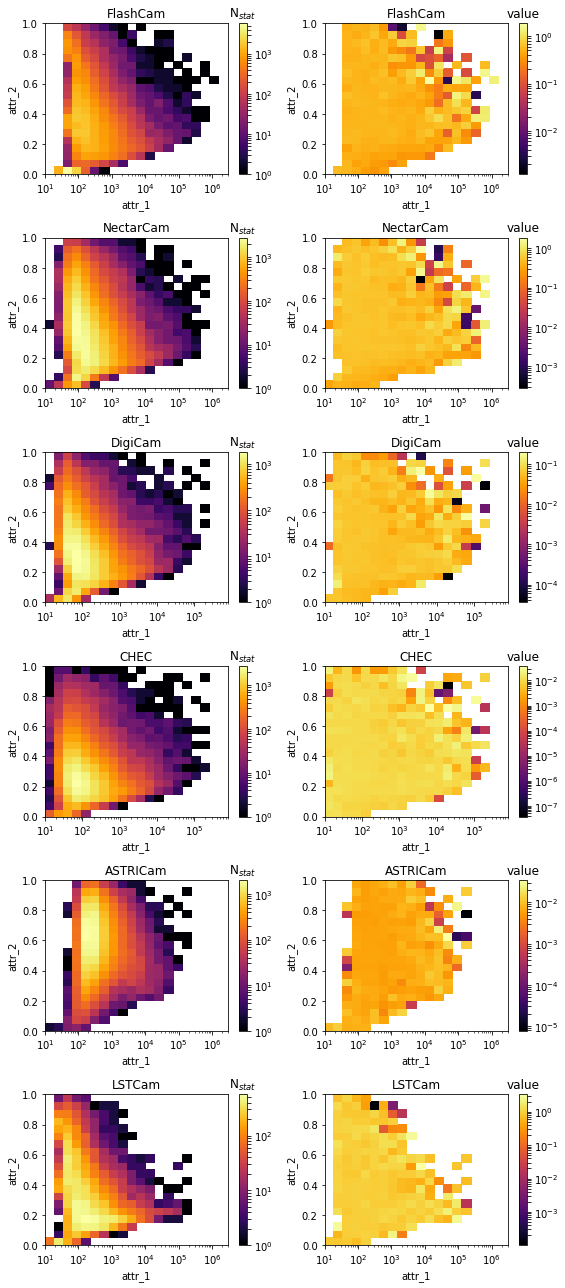

------- bin 3.0 to 4.0deg -------


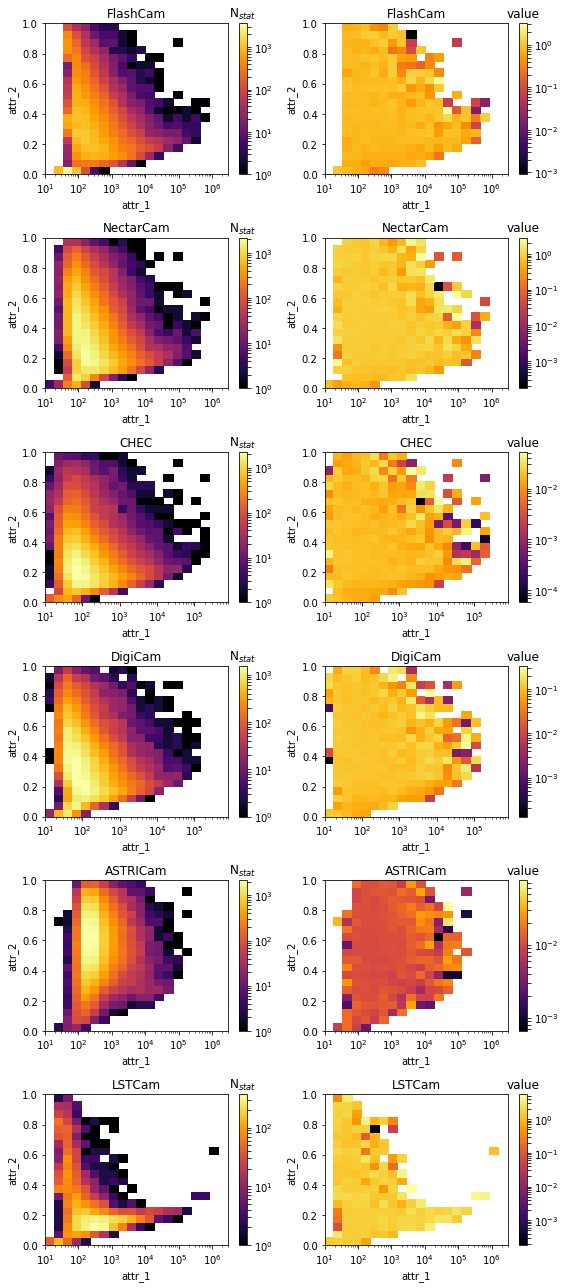

------- bin 4.0 to 5.0deg -------


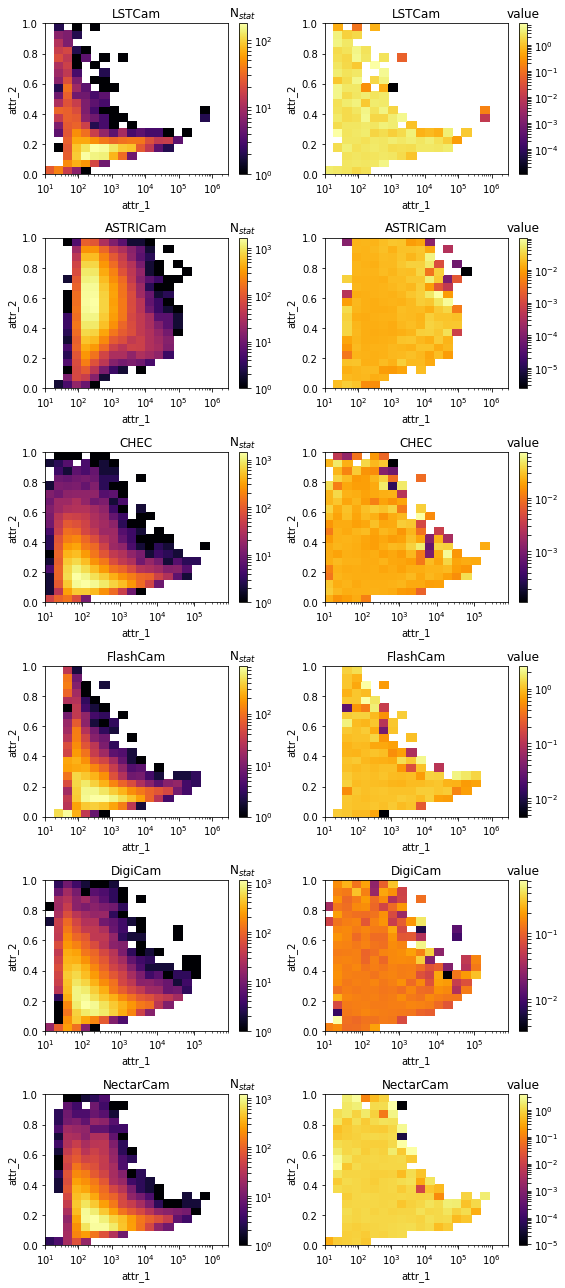

------- bin 5.0 to 6.0deg -------


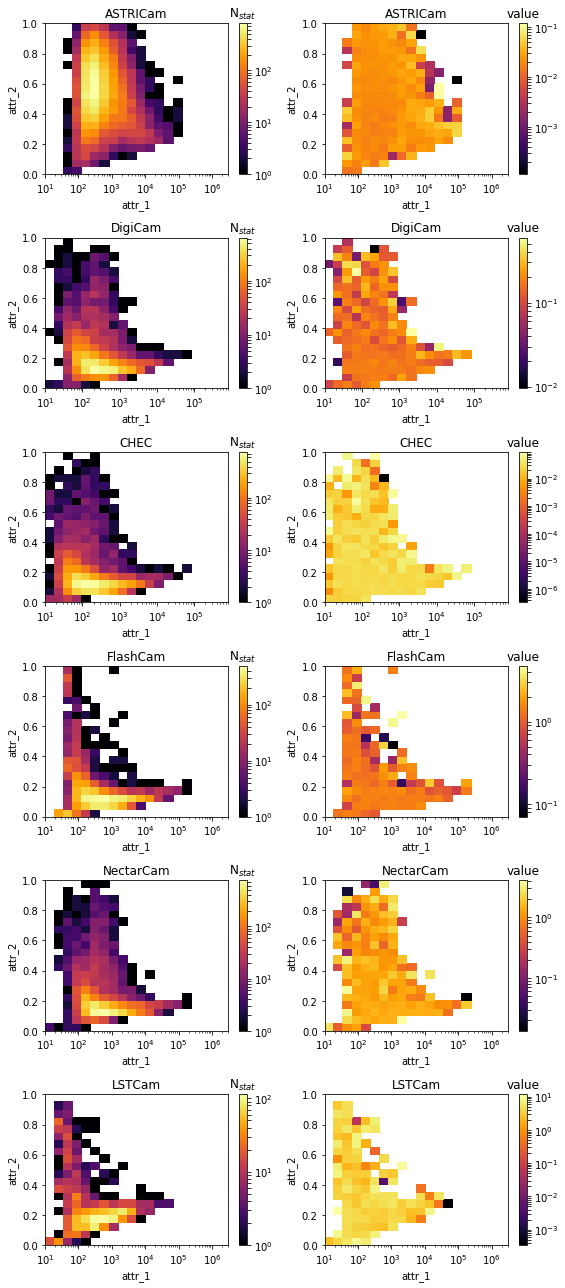

------- bin 6.0 to 7.0deg -------


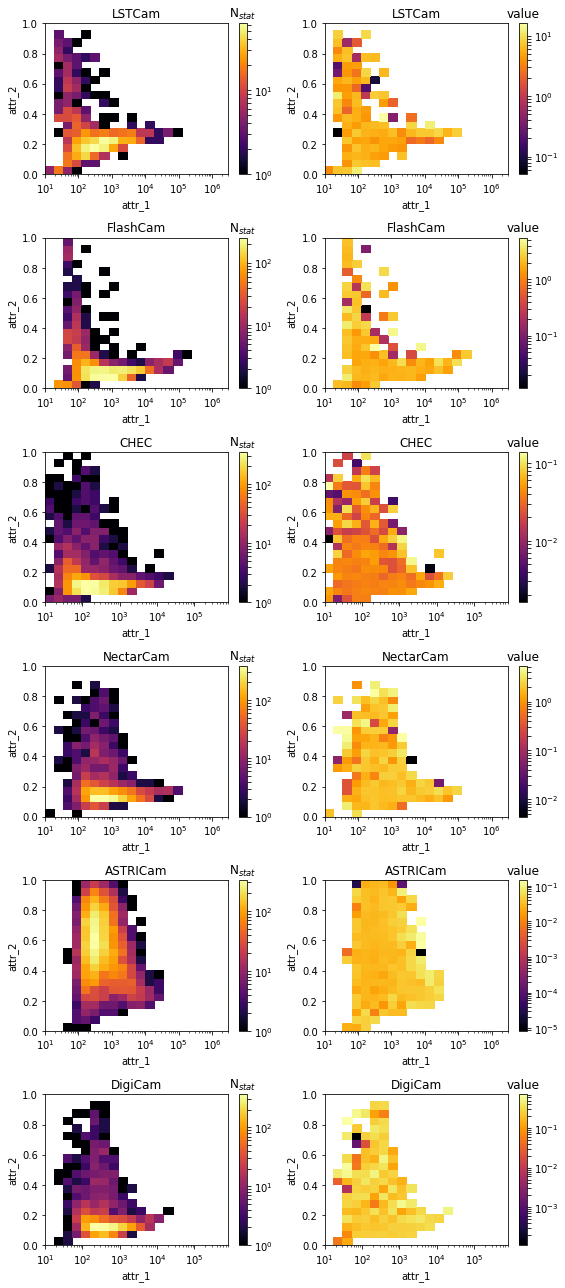

------- bin 7.0 to 8.0deg -------


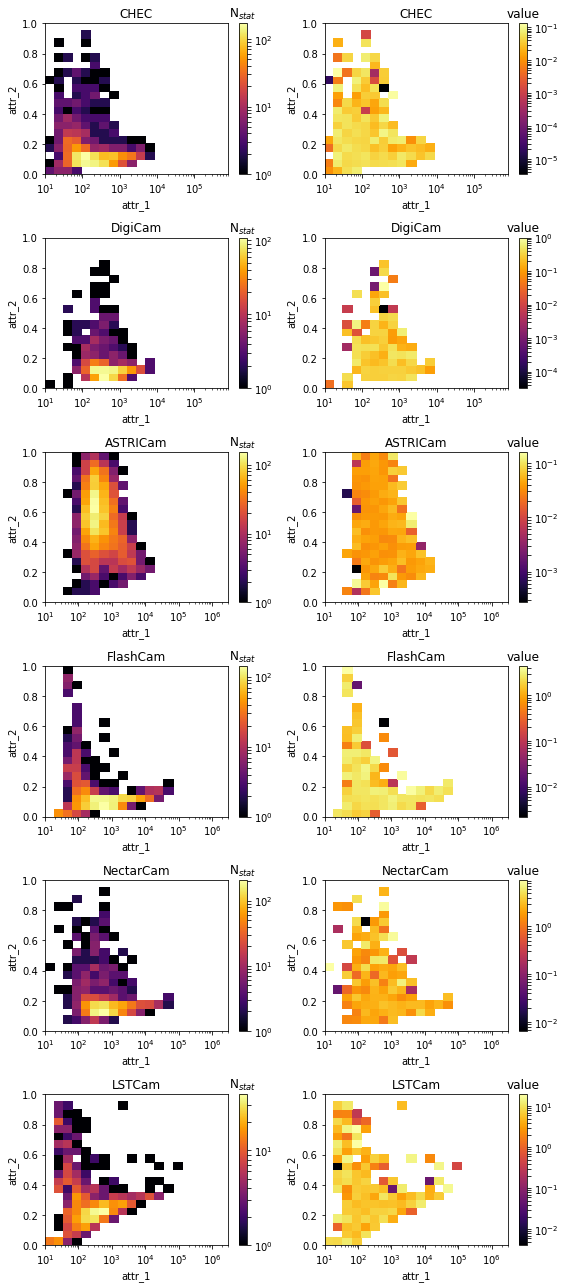

------- bin 8.0 to 9.0deg -------


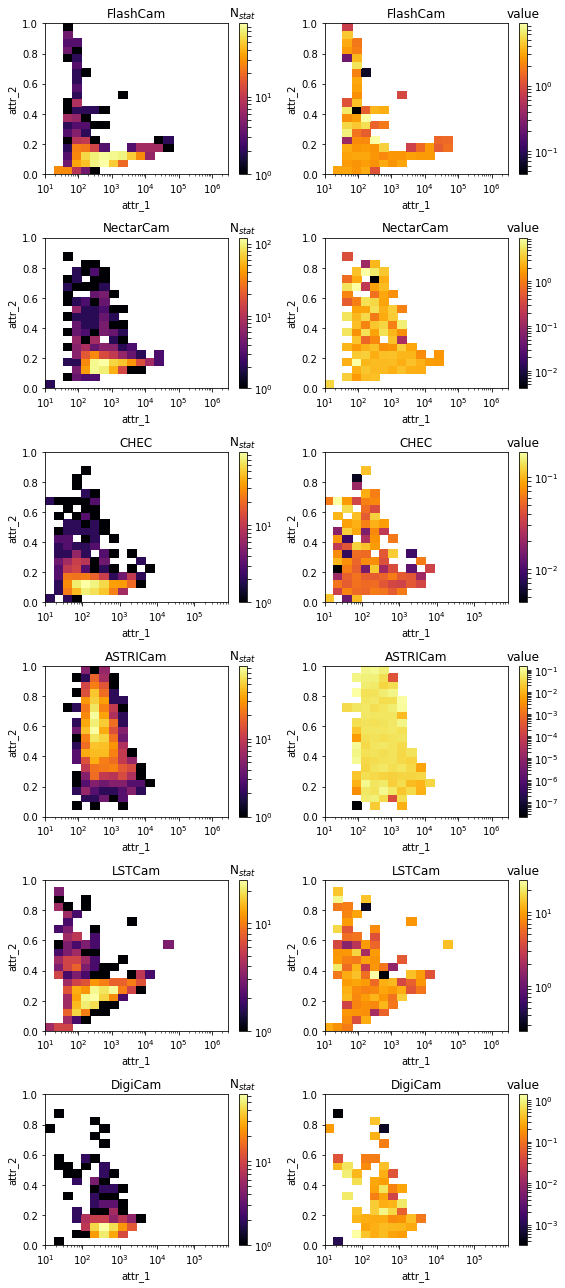

------- bin 9.0 to 10.0deg -------


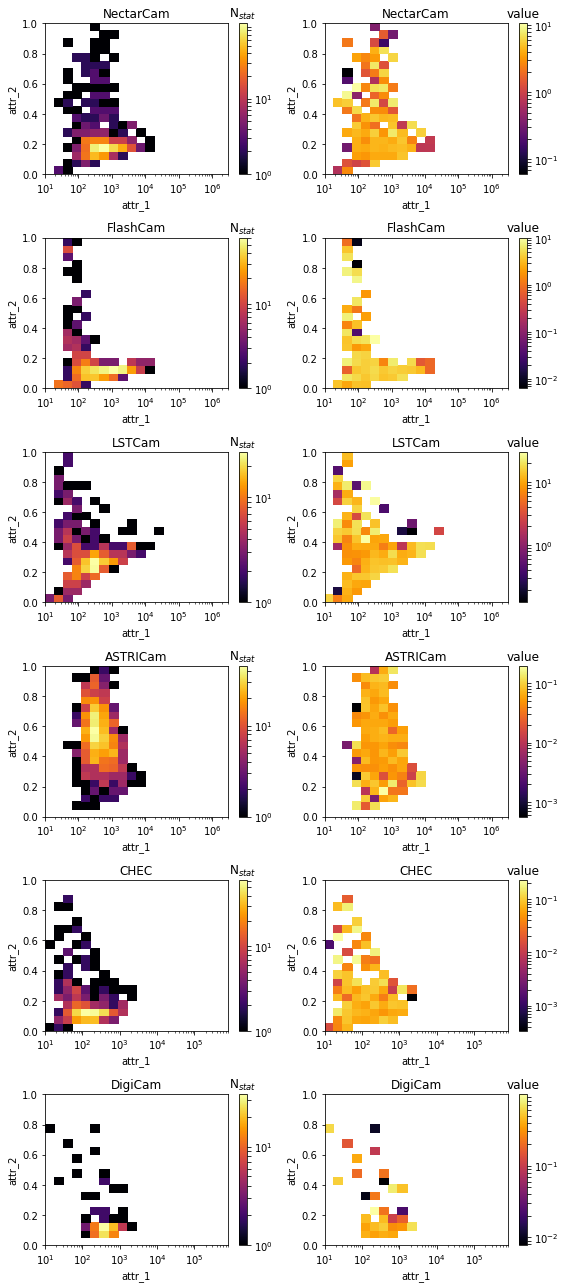

In [195]:
offangle_bins = np.linspace(0, 10, 11)
for offbin in range(len(offangle_bins)-1):
    files = glob.glob("/Users/konstantinpfrang/ctaout/diffuse/make_LUT/LUT_500_offangles/*bin{}*.json".format(offbin))
    LUTgen = LookupGenerator.combine_LUTs(files)
    print("------- bin {} to {}deg -------".format(offangle_bins[offbin],offangle_bins[offbin+1]))
    LUTgen.display_lookup()
    plt.show()

In [58]:
LUTgen = LookupGenerator.combine_LUTs(files)

/Users/konstantinpfrang/anaconda3/envs/cta-dev/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


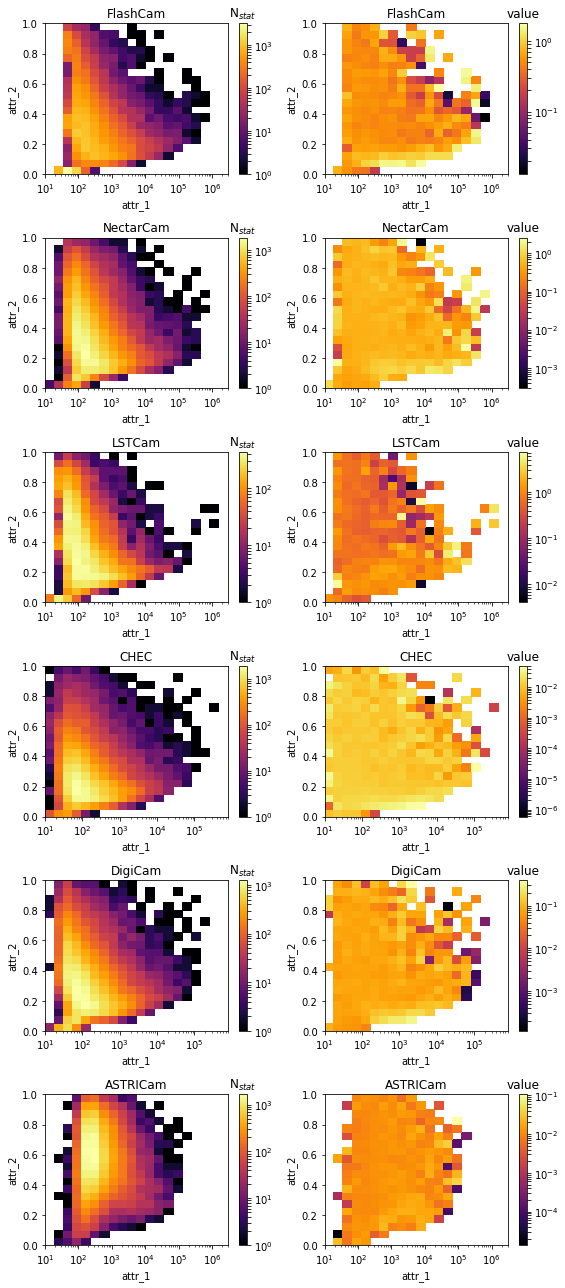

In [171]:
LUTgen.display_lookup()